<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
display(hh_df.head(2))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Вывод:  
В столбцах: 'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность' - имеются нулевые значения.

5. Выведите основную статистическую информацию о столбцах.


In [5]:
display(hh_df.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


Контрольный вопрос: Сколько соискателей имеет средний уровень образования (школьное образование)?

In [6]:
def get_education(strn):
    """Функция для преобразования столбца 'Образование и ВУЗ'.
    Принимает строку столбца, выделяет в ней первые два слова, по ключевым 
    словосочетаниям (подстрокам) определяет и возвращает категорию образования"""
    strn = ' '.join(strn.split(' ')[:2])
    if 'Высшее' in strn:
        return 'высшее'
    elif 'Неоконченное высшее' in strn:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in strn:
        return 'среднее специальное'
    elif 'Среднее образование' in strn:
        return 'среднее'
 
    
# Создаём новый признак "Образование"   
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
# Удаляем признак 'Образование и ВУЗ'
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)
# Выводим ответ на контрольный вопрос
print(hh_df['Образование'].value_counts()['среднее'], "соискателей имеет средний уровень образования.")

559 соискателей имеет средний уровень образования.


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
def get_gender(strn):
    """Функция для преобразования столбца 'Пол, возраст'.
    Принимает строку столбца, по ключевому слову "Мужчина"
    возвращает "М", иначе "Ж" """
    if 'Мужчина' in strn:
        return 'М'
    else:
        return 'Ж'
 
    
def get_age(strn):
    """Функция для преобразования столбца 'Пол, возраст'.
    Принимает строку столбца, разбивает еёс помощью split() в список подстрок по разделителю ' ',
    преобразовывает полученный список с помощью enumerate() в нумерованный список,
    в цикле находит индекс слова из списка (год, года, лет) и по меньшему на единицу индексу 
    возвращает возраст в виде числа лет """
    str_splitted = strn.split(' ')
    names=['год', 'года', 'лет']
    for index, item in enumerate (str_splitted):
        if item in names:
            return int(str_splitted[index-1])

# Создаём новый признак 'Пол'
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)
# Создаём новый признак 'Возраст'
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age)
# Удаляем признак 'Пол, возраст'
hh_df = hh_df.drop('Пол, возраст', axis=1)
# Выводим ответы на контрольные вопросы
print(round(hh_df['Пол'].value_counts(normalize=True)['Ж'] * 100, 2), "процентов женских резюме представлено в данных")
print("Средний возраст соискателей", hh_df['Возраст'].mean().round(2), "года")

19.07 процентов женских резюме представлено в данных
Средний возраст соискателей 32.2 года


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


Вопрос: Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [8]:
def get_experience(strn):
    """Функция для преобразования столбца 'Опыт работы'.
    Принимает строку столбца. Если строка представляет элемент списка (np.nan,'Не указано')
    возвращает None, иначе, выделяет с помощью split() первые семь слов строки через ' ',
    содержащих общий стаж работы соискателя. Преобразовывает полученный список с помощью enumerate()
    в нумерованный список, в цикле находит индексы слов из списков year_words и month_words, по
    меньшему на единицу индексу запоминает число лет и/или число месяцев стажа работы и сумировав их 
    возвращает сумму в месяцах."""
    list_nan = (np.nan,'Не указано')
    if strn in list_nan:
        return None
    
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    str_splitted = strn.split(' ')[:7]
    year = 0
    month = 0
    for index, item in enumerate (str_splitted):
        if item in year_words:
            year = int(str_splitted[index-1])
        if item in month_words:
            month = int(str_splitted[index-1])
    return (year*12 + month)


# Создаём новый признак 'Опыт работы (месяц)'
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)
# Удаляем признак 'Опыт работы'
hh_df = hh_df.drop('Опыт работы', axis=1)
# Выводим ответ на контрольный вопрос
print("Медианный опыт работы (в месяцах) в нашей таблице:", hh_df['Опыт работы (месяц)'].median().round())

Медианный опыт работы (в месяцах) в нашей таблице: 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


Вопросы:
1. Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.  
2. Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [9]:
def get_city(strn):
    """Функция для преобразования столбца 'Город, переезд, командировки'.
    Принимает строку столбца, с помощью split() разбивает её по разделителю ' ,' 
    и выделяет первый элемент полученного списла. В случае вхождения выделенного 
    названия в список ('Москва', 'Санкт-Петербург') возвращает возвращает его. 
    В случае вхождения выделенного слова в список городов миллионников возвращает -
    'город-миллионник', иначе, возвращает - 'другие'."""
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',\
        'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    megapolis = ['Москва', 'Санкт-Петербург']
    city = strn.split(' ,')[0]
    if city in megapolis:
        return city
    if city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
    
def get_ready_to_move(strn):
    """Функция для преобразования столбца 'Город, переезд, командировки'. 
    Принимает строку столбца, если находит в строке подстроки - 'не готов к переезду', 
    или 'не готова к переезду' - возвращает 'False', иначе 'True', определяя, таким образом, 
    готовность соискателя к переездам."""
    if ('не готов к переезду' in strn) or('не готова к переезду' in strn):
        return False
    else:
        return True    

    
def get_ready_for_bisiness_trips(strn):
    """Функция для преобразования столбца 'Город, переезд, командировки'. 
    Принимает строку столбца, если находит в строке слово 'командировка', проверяет строку на 
    вхождение подстрок - 'не готов к командировкам', или 'не готова к командировкам' - возвращает 'False',
    иначе 'True', определяя, таким образом, готовность соискателя к командировкам."""
    if ('командировка' in strn):
        if ('не готов к командировкам' in strn) or('не готова к командировкам' in strn):
            return False
        else:        
            return True
    else:
        return False


# Создаём новый признак 'Город'
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
# Создаём новый признак 'Готовность к переезду'
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_move)
# Создаём новый признак 'Готовность к командировкам'
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply( get_ready_for_bisiness_trips)
# Удаляем признак 'Город, переезд, командировки'
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)
# Выводим ответы на контрольные вопросы
print("В Санкт-Петрбурге живут:", (hh_df['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100).round(), "процентов соискателей.") 
print("Готовы одновременно и к переездам, и к командировкам:", round(hh_df[hh_df['Готовность к переезду'] \
            & hh_df['Готовность к командировкам']].shape[0] / hh_df.shape[0] *100), "процента соискателей.") 

В Санкт-Петрбурге живут: 11.0 процентов соискателей.
Готовы одновременно и к переездам, и к командировкам: 32 процента соискателей.


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

Вопросы:
1. Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?  
2. Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?

In [10]:
# Создаём список категорий желаемой занятости
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
# Сщздаём список категорий желаемого графика работы
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
"""В цикле создаём попарно пять новых признаков занятоси и пять признаков графика работы, из столбцов
'Занятость' и 'График' датафрейма с помощью функции zip(), создающей список кортежей из элементов 
вложенных в функцию списков, и лямбда функций, заменяющих строку стобца (Занятость' или 'График') на 
'True' или 'False' в зависимости от присутствия проверяемого признака в строке."""
for employment, chart in zip(employments, charts):
    hh_df[employment] = hh_df['Занятость'].apply(lambda x: employment in x)
    hh_df[chart] = hh_df['График'].apply(lambda x: chart in x)

# Удаляем признаки 'Занятость' и 'График'    
hh_df = hh_df.drop('Занятость', axis=1)
hh_df = hh_df.drop('График', axis=1)
# Выводим ответы на контрольные вопросы
print(hh_df[hh_df['проектная работа'] & hh_df['волонтерство']].shape[0], "человек ищет проектную работу и волонтёрство одновременно.")
print(hh_df[hh_df['вахтовый метод'] & hh_df['гибкий график']].shape[0], "человек хотят работать вахтовым методом и с гибким графиком одновременно.") 

436 человек ищет проектную работу и волонтёрство одновременно.
2311 человек хотят работать вахтовым методом и с гибким графиком одновременно.


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


Вопрос: Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?

Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.

In [11]:
def get_salary_amount(strn):
    """Функция для преобразования столбца 'ЗП'. 
    Принимает строку столбца, с помощью split() разбивает её по ' ', и возвращает 
    первый элемент списка (величину зарплаты) в формате целого числа """
    salary = int(strn.split(' ')[0])
    return salary


def get_currency(strn):
    """Функция для преобразования столбца 'ЗП'.
    Принимает строку столбца, выделяет второй элемент списка разбиения,
    удаляет с помощью .replace('.', '') из выделенной подстроки, если есть, точку,
    получает, таким образом, сокращённое название валюты в датафрейме. Если полученное 
    название 'руб', возвращает 'RUB', иначе, используя 
    полученное название в виде ключа к словарю currency_dict, возвращает общепринятое 
    сокращение названия другой валюты."""
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    currn = strn.split(' ')[1].replace('.', '')
    if currn == 'руб':
        return 'RUB'
    else:
        return currency_dict[currn]
 

# Создаём признаки 'ЗП (сумма)' и 'ЗП (валюта)'
hh_df['ЗП (сумма)'] = hh_df['ЗП'].apply(get_salary_amount) 
hh_df['ЗП (валюта)'] = hh_df['ЗП'].apply(get_currency)
# Создаём датафрейм (считываем файл.csv) с курсами валют на время выкладки резюме
ExchangeRates_df = pd.read_csv('data/ExchangeRates.csv', sep=',')
# Преобразуем признаки 'Обновление резюме' и 'date' в формат datetime и извлекаем из них дату
ExchangeRates_df['date'] = pd.to_datetime(ExchangeRates_df['date'], dayfirst=True).dt.date
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date

# Объединяем датафреймы с помощью метода merge по столбцам с датой и валютой 
# с сохранением всей информации из датофрейма с резюме"""
merged = pd.merge(
    hh_df, ExchangeRates_df, 
    right_on=['date', 'currency'], 
    left_on=['Обновление резюме', 'ЗП (валюта)'], 
    how='left'
)
# В объединённом датофрейме в столбцах с курсом и пропорцией конвертации валют заменяем 
# нулевые значения, соответствующие желаемой зарплате в рублях, на единицу
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
# Создаём признак 'ЗП (руб)' в датафрейме с резюме из 'ЗП (сумма)' умнажением величины 
# зарплаты на курс и делением на пропорцию из объединённого датафрейма
hh_df['ЗП (руб)'] = merged['ЗП (сумма)']*merged['close']/merged['proportion']
# Удаляем признаки 'ЗП', 'ЗП (сумма)', 'ЗП (валюта)' из датафрейма с резюме
hh_df = hh_df.drop(['ЗП', 'ЗП (сумма)', 'ЗП (валюта)'], axis=1)
# Выводим ответ на контрольный вопрос
print("Желаемая медианная заработная плата соискателей равна:", round(hh_df['ЗП (руб)'].median()/1000), "тыс. руб.")

Желаемая медианная заработная плата соискателей равна: 59 тыс. руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [12]:
fig = px.histogram(
    data_frame=hh_df,
    x='Возраст',
    title='Распределение возраста соискателей',
    histnorm='percent',
    width=800,
    marginal='box'    
)

fig.write_html("plotly/img1.html")
fig.write_image('pictures/img1.png')
#fig.show()

Выводы:  
* Мода распределения возраста соискателей равна 30 годам.
* Минимальный и максимальныйц возраст соискателей в данных соответственно 14 и 100 лет.
* Возраст большинства соискателей находится в интервале приблезительно от 27 до 36 лет.
* Среди соискателей есть аномально юные (14-15 лет) и аномально пожилой (100 лет) кандидаты.  

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [13]:
fig = px.histogram(
    data_frame=hh_df,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    histnorm='percent',
    width=1200,
    marginal='box',
    nbins=200
)

fig.write_html("plotly/img2.html")
fig.write_image('pictures/img2.png')
#fig.show()

Выводы:
* Мода распределения опыта работы соискателей равна 80-89 месяцев.
* Минимальный и максимальный опыт работы соискателей соответственно 1 и 1188 месяцев.
* Опыт работы большинства соискателей лежит в интервале приблезительно от 57 до 154 месяцев.
* Аномальным значением является 1188 месяцев - что соответствует 99 годам.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака заработной платы? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [14]:
fig = px.histogram(
    data_frame=hh_df,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    histnorm='percent',
    width=1200,
    marginal='box'
)

fig.write_html("plotly/img3.html")
fig.write_image('pictures/img3.png')
#fig.show()

Выводы:
* Минимальной и максимальной желаемой зарплатой в данных являются соответственно 1 руб. и 24,3 млн. руб.
* Желаемая зарплата соискателей приблезительно от 37 до 95 тыс. руб.
* Аномальными значениями зарплат являются как 1 руб. так и значения от 1 млн. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [15]:
bar_data = hh_df[hh_df['ЗП (руб)']<1e6].groupby(
    'Образование',
    as_index=False # Функция вернёт DataFrame
    ).median() 
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title="Зависимость медианной желаемой заработной платы от уровня образования",
    width=800
)

fig.write_html("plotly/img4.html")
fig.write_image('pictures/img4.png')
#fig.show("png")

C:\Users\user\AppData\Local\Temp\ipykernel_10680\3852585954.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Выводы:
* Наибольший и наименьший уровень желаемой зарплаты наблюдается соответственно у соискателей с высшим и средним образованием.  
* При прогнозировании  нужно учитывать положительную зависимость уровня образования и уровня зарплаты.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [16]:
box_df = hh_df[hh_df['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=box_df,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение желаемой заработной платы по городам'
)

fig.write_html("plotly/img5.html")
fig.write_image('pictures/img5.png')
#fig.show("png")

Выводы:
* Медианный уровень и размах желаемых зарплат растёт в последовательности ('города-миллионники' и 'друкие')->'Санкт-Петербург'->'Москва'.
* При прогнозировании зарплаты необходимо учитывать выявленную зависимость.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [17]:
bar_df = hh_df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False # Функция вернёт DataFrame
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_df,
    y='ЗП (руб)',
    x='Готовность к командировкам',
    barmode="group",
    color='Готовность к переезду',
    orientation='v',
    title='Медианная заработная плата по готовности к командировкам/переезду',
    width=800
)

fig.write_html("plotly/img6.html")
fig.write_image('pictures/img6.png')
#fig.show("png")

Вывод: При прогнозировании зарплат нужно учитывать положительную зависимость от готовности к командировкам/переезду  
в следующей последовательности: Нет/Нет -> Нет/Да -> Да/Нет -> Да/Да. 

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [18]:
def get_career_stage(num):
    """Функция для преобразования столбца 'Возраст'.
    Принимает число лет а возвращает нумерованное название 
    карьерного периода в который это число попадает."""
    if num  < 25:
        return "1 Предварительный"
    elif num >= 25 and num < 30:
        return "2 Становление"
    elif num >= 30 and num < 45:
        return "3 Продвижение"
    elif num >= 45 and num < 60:
        return "4 Сохранение"
    elif num >= 60 and num < 65:
        return "5 Завершение"
    elif num >= 65:
        return "6 Пенсионный"
    

# Создаём новый признак 'Периоды карьеры'
hh_df['Периоды карьеры'] = hh_df['Возраст'].apply(get_career_stage)
# Создаём сводную таблицу для тепловой карты и сортируем 
# её значения по убыванию нумерованных периодов карьеры.
pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Периоды карьеры',
    aggfunc='median',
    fill_value=0 # Устанавливаем возможные значения NaN в ноль
)
# Удаляем временный признак 'Периоды карьеры'
hh_df = hh_df.drop('Периоды карьеры', axis=1)  
fig = px.imshow(
    pivot,
    title='Зависимость медианной желаемой заработной платы от возраста и образования',
    labels={'x':'Периоды карьеры', 'y':'Образование'},
    x=['До 25 лет', 'От 25 до 30 лет', 'От 30 до 45 лет', 'От 45 до 60 лет', 'От 60 до 65 лет', 'От 65 лет'],
    width=800,
    height=500,    
    color_continuous_scale='greens'# цветовая гамма    
    )

fig.write_html("plotly/img7.html")
fig.write_image('pictures/img7.png')
#fig.show("png")

Выводы:
* На картограмме отчётливо прослеживается зависимость желаемой зарплаты от карьерного периода жизни 
соискателя, кроме юных представителей группы с школьным образованием. лет"
* Уровень желаемых зарплат пропорционален уровню образования соискателей за исключением  представителей 
группы среднего образования в карьерные периоды: "До 25 лет" и "От 30 до 45 лет".
* При прогнозировании зарплаты следует учитывать что желаемая зарплата растёт до 60-ти летнего 
возраста соискателей, а также, максимально высока у представителей группы с высшим и средним специальным образованием после 65 лет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Создаём новый признак 'Опыт работы (лет)'
hh_df['Опыт работы (лет)'] = hh_df['Опыт работы (месяц)']/12

fig = px.scatter(
   hh_df,
    x='Возраст',
    y='Опыт работы (лет)'
    )

# Удаляем временный признак ''Опыт работы (лет)''
hh_df = hh_df.drop('Опыт работы (лет)', axis=1)

fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100]))   
            
fig.update_layout(
    title="Зависимость опыта работы от возраста",
    title_x = 0.5,
    xaxis_title="Возраст",
    yaxis_title="Опыт работы",
    width=1000,
    height=600
)

fig.write_html("plotly/img8.html")
fig.write_image('pictures/img8.png')
#fig.show("png")

Выводы: 
* В данных присутствуют 7 резюме в которых указан опыт работы больший возраста соискателя. 
* Такие данные подлежат очистке.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [20]:
bar_data = hh_df[hh_df['ЗП (руб)']<1e6].groupby(
    ['Пол', 'Образование'], 
    as_index=False
    ).median()
fig = px.bar(
    data_frame=bar_data,
    x='Пол',
    y='ЗП (руб)',
    color="Образование",
    title="Зависимость медианной желаемой заработной платы от пола и образования соискателей",
    width=800
)

fig.write_html("plotly/img9.html")
fig.write_image('pictures/img9.png')
#fig.show("png")

C:\Users\user\AppData\Local\Temp\ipykernel_10680\2385816059.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Вывод:
* В каждой категории образования женщины претендуют на меньшую чем мужчины заработную плату.

10. Исследуем зависимость медианной желаемой зарплаты от признаков полной/неполной занятости. 

In [21]:
bar_df = hh_df.groupby(
    ['полная занятость', 'частичная занятость'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_df,
    y='ЗП (руб)',
    x='полная занятость',
    barmode="group",
    color='частичная занятость',
    orientation='v',
    title='Зависимость медианной желаемой зарплаты от признаков полной/неполной занятости',
    width=900
)

fig.write_html("plotly/img10.html")
fig.write_image('pictures/img10.png')
#fig.show("png")

Вывод: Соискатели готовые на полную занятость претендуют на большую заработную плату.  

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
duplicates = hh_df[hh_df.duplicated(subset=hh_df.columns)]
hh_df = hh_df.drop_duplicates()
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
null_data = hh_df.isnull().sum()
print(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64


3. Итак, у нас есть пропуски в 3-ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
hh_df = hh_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы (месяц)'].fillna(hh_df['Опыт работы (месяц)'].median())
print(round(hh_df['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
mask1 = hh_df['ЗП (руб)'] > 1e6
mask2 = hh_df['ЗП (руб)'] < 1000
outliers = hh_df[mask1 | mask2]
hh_df = hh_df.drop(outliers.index)
print(outliers.shape[0])

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
outliers = hh_df[hh_df['Опыт работы (месяц)']/12 >= hh_df['Возраст']]
hh_df = hh_df.drop(outliers.index)
print(outliers.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
31137     15
32950     15
33654    100
Name: Возраст, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_10680\3299998133.py:33: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



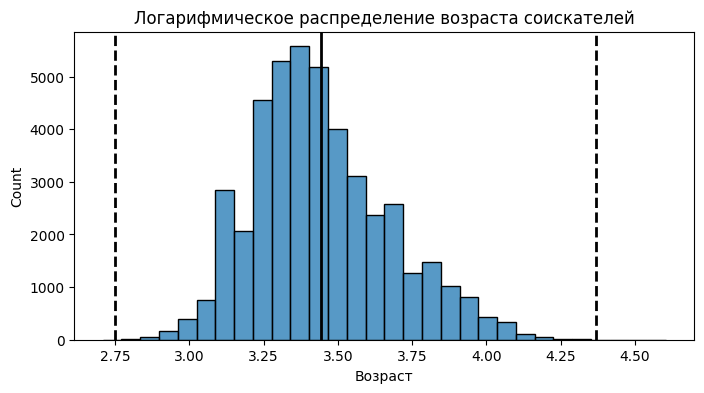

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_df['Возраст']) # Поскольку у признака нет нулевых значений, единицу прибавлять ненужно
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2) # Линия среднего значения
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2) # Линия правой границы интервала 
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2) # Линия левой границы интервала
histplot.set_title('Логарифмическое распределение возраста соискателей');

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    """Функция реализует метод z-отклонений.
    Принимает датафрейм и имя ключевого столбца, в зависимости от значения log_scale логарифмирует или нет значения элементов 
    столбца, далее вычисляет среднее значение и стандартное отклонение исследуемых данных и фильтрует их на 
    вхождение в интервал 3-х сигм (по умолчанию). Границы интервала могут быть изменены при вызове функции через 
    параметры левой и правой (left, right)границ. Функция возвращает два датафрейма: outliers - по значениям 
    вводимого столбца не попавшим в контрольный интервал, и cleaned - по значениям попавшим в интервал"""
    if log_scale:
        x = np.log(hh_df[feature])
    else:
        x = hh_df[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


# В вызове функции увеличиваем параметр 'right' на единицу, устанавливаем логарифмический масштаб
outliers, data = outliers_z_score_mod(hh_df, 'Возраст', right=4, log_scale=True) 
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(outliers['Возраст'])
fig.show("png")
hh_df.to_csv('data/hh_df_cleared.csv') # Записываем таблицу в формат .csv в папку data

Выводы:
* Поскольку линия среднего значения правее моды, распределение имеет правостороннюю ассиметрию.
* В результате применения метода z-отклонения выявлено три выброса: 100, 15, 15 лет.